In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('teleCust', data_home='Datasets')
df.head()

region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [13]:
for i in df.columns:
    print(df[i].value_counts())
    print("-")

region
3    344
2    334
1    322
Name: count, dtype: int64
-
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: count, Length: 72, dtype: int64
-
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
-
marital
0    505
1    495
Name: count, dtype: int64
-
address
1     68
2     66
4     61
3     61
0     56
7     53
5     50
9     41
8     39
10    38
12    36
6     36
13    33
19    29
14    24
15    24
11    23
17   

In [14]:
df1 = df.drop(["ed", "employ"], axis=1)
df1.head()

region  tenure  age  marital  address  income  retire  gender  reside  \
0       2      13   44        1        9    64.0     0.0       0       2   
1       3      11   33        1        7   136.0     0.0       0       6   
2       3      68   52        1       24   116.0     0.0       1       2   
3       2      33   33        0       12    33.0     0.0       1       1   
4       2      23   30        1        9    30.0     0.0       0       4   

   custcat  
0        1  
1        4  
2        3  
3        1  
4        3

<Axes: >

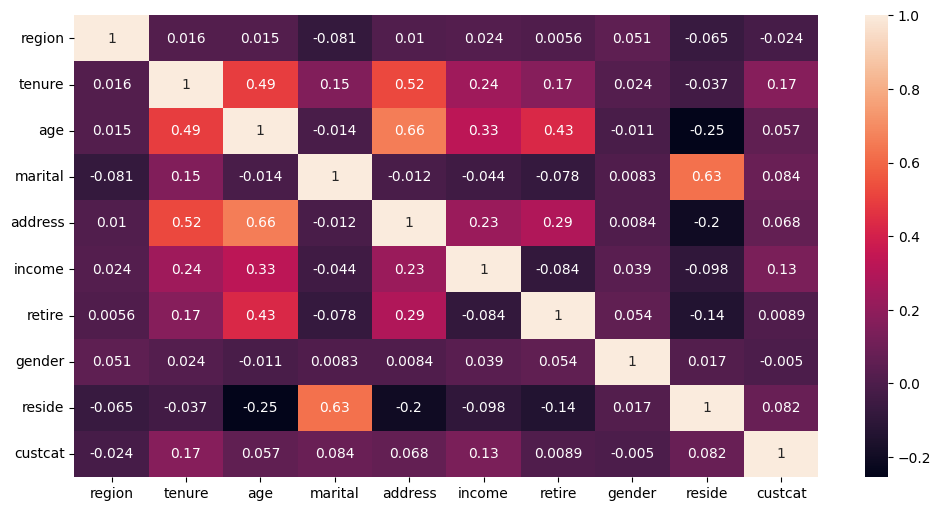

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df1.corr(), annot=True)

In [17]:
df2 = df1.drop(["retire", "gender"], axis=1)
df2.head()

region  tenure  age  marital  address  income  reside  custcat
0       2      13   44        1        9    64.0       2        1
1       3      11   33        1        7   136.0       6        4
2       3      68   52        1       24   116.0       2        3
3       2      33   33        0       12    33.0       1        1
4       2      23   30        1        9    30.0       4        3

In [23]:
df2.reside.unique()

array([2, 6, 1, 4, 5, 3, 7, 8], dtype=int64)

In [27]:
region = pd.get_dummies(df['region'], drop_first=True, prefix="region", dtype="int")
reside = pd.get_dummies(df['reside'], drop_first=True, prefix="reside", dtype="int")

In [28]:
df4 = pd.concat([df2, region, reside], axis=1, )
df4.head()

region  tenure  age  marital  address  income  reside  custcat  region_2  \
0       2      13   44        1        9    64.0       2        1         1   
1       3      11   33        1        7   136.0       6        4         0   
2       3      68   52        1       24   116.0       2        3         0   
3       2      33   33        0       12    33.0       1        1         1   
4       2      23   30        1        9    30.0       4        3         1   

   region_3  reside_2  reside_3  reside_4  reside_5  reside_6  reside_7  \
0         0         1         0         0         0         0         0   
1         1         0         0         0         0         1         0   
2         1         1         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         1         0         0         0   

   reside_8  
0         0  
1         0  
2         0  
3         0  
4         0

In [29]:
df5 = df4.drop(['region', 'reside'], axis=1)
df5.head()

tenure  age  marital  address  income  custcat  region_2  region_3  \
0      13   44        1        9    64.0        1         1         0   
1      11   33        1        7   136.0        4         0         1   
2      68   52        1       24   116.0        3         0         1   
3      33   33        0       12    33.0        1         1         0   
4      23   30        1        9    30.0        3         1         0   

   reside_2  reside_3  reside_4  reside_5  reside_6  reside_7  reside_8  
0         1         0         0         0         0         0         0  
1         0         0         0         0         1         0         0  
2         1         0         0         0         0         0         0  
3         0         0         0         0         0         0         0  
4         0         0         1         0         0         0         0

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaled_var = df[["tenure", 'age', 'address', 'income' ]]

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(scaled_var)

StandardScaler()

In [41]:
scaled_var = scaler.transform(scaled_var)

In [42]:
scaled_var.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [43]:
sdf = pd.DataFrame(scaled_var, columns=["tenure", 'age', 'address', 'income' ])
sdf.head()

tenure       age   address    income
0 -1.055125  0.184505 -0.253034 -0.126506
1 -1.148806 -0.691812 -0.451415  0.546450
2  1.521092  0.821826  1.234819  0.359517
3 -0.118319 -0.691812  0.044536 -0.416251
4 -0.586722 -0.930808 -0.253034 -0.444291

In [50]:
df6 = df5.drop(["tenure", 'age', 'address', 'income' ], axis=1)
s_df = pd.concat([df6, sdf], axis=1)
s_df.head()

marital  custcat  region_2  region_3  reside_2  reside_3  reside_4  \
0        1        1         1         0         1         0         0   
1        1        4         0         1         0         0         0   
2        1        3         0         1         1         0         0   
3        0        1         1         0         0         0         0   
4        1        3         1         0         0         0         1   

   reside_5  reside_6  reside_7  reside_8    tenure       age   address  \
0         0         0         0         0 -1.055125  0.184505 -0.253034   
1         0         1         0         0 -1.148806 -0.691812 -0.451415   
2         0         0         0         0  1.521092  0.821826  1.234819   
3         0         0         0         0 -0.118319 -0.691812  0.044536   
4         0         0         0         0 -0.586722 -0.930808 -0.253034   

     income  
0 -0.126506  
1  0.546450  
2  0.359517  
3 -0.416251  
4 -0.444291

## KNN modeling

In [53]:
X = s_df.drop('custcat', axis=1)
y = s_df['custcat']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
k = 4
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [116]:
y_pred = model.predict(X_test)

In [117]:
from sklearn.metrics import accuracy_score

In [118]:
accuracy_score(y_test, y_pred)

0.325

In [119]:
k = 6
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [120]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.335